# Koeficijent korelacije

__U ovoj svesci ćemo se baviti merama korelacije između dva niza uparenih skupova numeričkih podataka. Sve te mere su nekakvi koeficijenti korelacije. Mi ćemo ovde na primeru koristiti koeficijent koji se obično podrazumeva -- Pirsonov koeficijent korelacije.__

Primer na kome ćemo videti kako se u Pajtonu traže, računaju i tumače korelacije je timska statistika košarkaške NBA lige preuzeta sa sajta [Basketball Reference](https://www.basketball-reference.com/teams/PHI/2021.html).

Pošto se statistika procenta šuta, broja skokova i asistencija već dugo objavljuje, taj skup podatka je dostupan za analizu i prilično jednostavan za tumačenje. Kroz analizu u ovoj svesci naći ćemo koje to godišnje statistike najbolje koreliraju sa brojem pobeda koje je jedan tim ostvario. 

Podatke potrebne za ovu analizu imate snimljene kao CSV fajlove u folderu __data__. Prvi je statistika svih NBA timova za dvadesetak kategorija u sezoni 2020/21. Drugi je statistika koju su protiv njih imali njihovi protivnici u ovoj sezoni. Treći fajl sadrži imena timova i broj pobeda koje su zabeležili u sezoni. U četvrtom fajlu je opis korišćenih oznaka.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
timovi=pd.read_csv("data/NBA21_teams.csv")
protivnici=pd.read_csv("data/NBA21_opponents.csv")
pobede=pd.read_csv("data/Broj_pobeda.csv")
oznake=pd.read_csv("data/key.csv")

Ovde ćemo samo pogledati zaglavlje tabale __timovi__ da bismo videli koje sve kategorije imamo. Izgleda da kategorija ima više nego što može da se prikaže na ovoj strani. Tri tačke (...) u tabeli nam govore da su tu neke kolone ostane neprikazane zbog manjka prostora. 

In [3]:
timovi.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Milwaukee Bucks*,72,17330,3221,6610,0.487,1038,2669,0.389,...,0.760,741,2724,3465,1834,585,334,995,1244,8649
1,2.0,Brooklyn Nets*,72,17405,3106,6289,0.494,1020,2600,0.392,...,0.804,640,2559,3199,1929,484,379,975,1371,8537
2,3.0,Washington Wizards*,72,17405,3108,6547,0.475,733,2088,0.351,...,0.769,697,2557,3254,1835,528,297,1037,1555,8398
3,4.0,Utah Jazz*,72,17355,2971,6344,0.468,1205,3098,0.389,...,0.799,765,2709,3474,1703,474,371,1023,1335,8382
4,5.0,Portland Trail Blazers*,72,17305,2973,6558,0.453,1132,2939,0.385,...,0.823,766,2441,3207,1531,496,363,799,1362,8360


Iste kategorije podataka imamo i za njihove protivnike. Odatle možemo da vidimo, na primer, da su timovi koji su igrali protiv Njujork Niksa postigli ukupno 2730 koševa iz igre (FG).

In [4]:
protivnici

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,New York Knicks*,72,17430,2730,6209,0.440,864,2565,0.337,...,0.761,695,2478,3173,1696,472,391,918,1286,7540
1,2.0,Los Angeles Lakers*,72,17455,2862,6221,0.460,818,2321,0.352,...,0.776,634,2392,3026,1776,593,327,1095,1530,7686
2,3.0,Utah Jazz*,72,17355,2943,6581,0.447,783,2293,0.341,...,0.768,706,2362,3068,1604,554,282,827,1365,7716
3,4.0,Los Angeles Clippers*,72,17280,2887,6223,0.464,833,2341,0.356,...,0.777,659,2307,2966,1650,510,304,925,1303,7764
4,5.0,Miami Heat*,72,17380,2815,6137,0.459,1027,2814,0.365,...,0.782,684,2404,3088,1857,541,287,1085,1414,7779
5,6.0,Philadelphia 76ers*,72,17430,2835,6259,0.453,857,2378,0.360,...,0.764,702,2388,3090,1694,521,335,1122,1509,7780
6,7.0,Phoenix Suns*,72,17480,2916,6248,0.467,836,2359,0.354,...,0.778,674,2401,3075,1652,498,258,981,1294,7881
7,8.0,Denver Nuggets*,72,17480,2883,6149,0.469,934,2570,0.363,...,0.773,652,2314,2966,1864,540,325,1014,1379,7929
8,9.0,Dallas Mavericks*,72,17305,2885,6269,0.460,925,2537,0.365,...,0.764,704,2460,3164,1631,527,264,908,1446,7933
9,10.0,Detroit Pistons,72,17430,2980,6260,0.476,817,2260,0.362,...,0.760,717,2475,3192,1785,578,419,1004,1469,7998


Ono što takođe vidimo je da imamo nepotrebni red u u kom su prosečni podaci za sve timove. Taj podatak nam ne treba pa ćemo taj red obrisati pomoću funkcije `drop()`. To je u obe tabele 31. red ima u Pajtonu indeks 0.

In [5]:
timovi.drop(30,inplace=True)

In [6]:
protivnici.drop(30,inplace=True)

Bilo bi dobro da sad ove dve tabele spojimo u jednu. Kako nije zgodno da se nazivi kolona dupliraju (jednom imamo FG% kao procenat šuta samog tima, a drugi put kao procenat šuta njihovih protivnika), promenićemo imena polovini promenljivih. Svim promenjivim koje se odnose na statistiku protivnika ćemo dodati "Opp_" u naziv.

In [7]:
protivnici.columns="Opp_"+protivnici.columns

In [8]:
protivnici.columns

Index(['Opp_Rk', 'Opp_Team', 'Opp_G', 'Opp_MP', 'Opp_FG', 'Opp_FGA', 'Opp_FG%',
       'Opp_3P', 'Opp_3PA', 'Opp_3P%', 'Opp_2P', 'Opp_2PA', 'Opp_2P%',
       'Opp_FT', 'Opp_FTA', 'Opp_FT%', 'Opp_ORB', 'Opp_DRB', 'Opp_TRB',
       'Opp_AST', 'Opp_STL', 'Opp_BLK', 'Opp_TOV', 'Opp_PF', 'Opp_PTS'],
      dtype='object')

Sada je ostalo da spojimo tabele. Iz nekog razloga redosled timova nije isti u obe tabele pa ćemo morati da povezujemo podatke vodeći računa o tome kom timu pripadaju. Funkcije `merge()` će to znati da uradi ako joj kažemo da treba povezati podatke za __Team__ iz prve i __Opp_Team__ iz druge tabele. Tu zbirnu tabelu ćemo nazvati __tabela__.

In [9]:
tabela=timovi.merge(protivnici,left_on="Team",right_on="Opp_Team")

In [10]:
tabela

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,Opp_FT%,Opp_ORB,Opp_DRB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF,Opp_PTS
0,1.0,Milwaukee Bucks*,72,17330,3221,6610,0.487,1038,2669,0.389,...,0.780,693,2435,3128,1804,507,348,947,1320,8225
1,2.0,Brooklyn Nets*,72,17405,3106,6289,0.494,1020,2600,0.392,...,0.775,753,2348,3101,1729,550,330,908,1361,8213
2,3.0,Washington Wizards*,72,17405,3108,6547,0.475,733,2088,0.351,...,0.781,738,2580,3318,1762,587,348,1056,1586,8530
3,4.0,Utah Jazz*,72,17355,2971,6344,0.468,1205,3098,0.389,...,0.768,706,2362,3068,1604,554,282,827,1365,7716
4,5.0,Portland Trail Blazers*,72,17305,2973,6558,0.453,1132,2939,0.385,...,0.787,710,2558,3268,1794,440,333,892,1374,8231
5,6.0,Indiana Pacers,72,17455,3115,6567,0.474,889,2445,0.364,...,0.782,813,2555,3368,1877,535,381,1066,1306,8305
6,7.0,Phoenix Suns*,72,17480,3118,6357,0.490,940,2490,0.378,...,0.778,674,2401,3075,1652,498,258,981,1294,7881
7,8.0,Denver Nuggets*,72,17480,3114,6422,0.485,927,2462,0.377,...,0.773,652,2314,2966,1864,540,325,1014,1379,7929
8,9.0,New Orleans Pelicans,72,17430,3060,6412,0.477,762,2190,0.348,...,0.790,644,2366,3010,1866,555,426,961,1534,8272
9,10.0,Los Angeles Clippers*,72,17280,3009,6242,0.482,1027,2498,0.411,...,0.777,659,2307,2966,1650,510,304,925,1303,7764


Primetite da pored naziva nekih timova u tabeli __tabela__ stoji zvezdica. Šta god to značilo, to nam ovde smeta da povežemo podatke sa tabelom __pobede__ u kojoj nazivi timova nemaju zvezdicu. Pomoću funkcije `str.replace()` ćemo zameniti znak zvezdica praznim stringom.

In [11]:
tabela['Team']=tabela['Team'].str.replace('*','',regex=False)

Sada možemo da povežemo statistike sa brojem pobeda. To praktično znači da ćemo tabeli dodati kolonu u kojoj piše kolikom je kojin tim ostvario pobeda.

In [12]:
tabela=tabela.merge(pobede,on='Team')

In [ ]:
tabela

In [13]:
tabela.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Opp_Rk', 'Opp_Team', 'Opp_G', 'Opp_MP',
       'Opp_FG', 'Opp_FGA', 'Opp_FG%', 'Opp_3P', 'Opp_3PA', 'Opp_3P%',
       'Opp_2P', 'Opp_2PA', 'Opp_2P%', 'Opp_FT', 'Opp_FTA', 'Opp_FT%',
       'Opp_ORB', 'Opp_DRB', 'Opp_TRB', 'Opp_AST', 'Opp_STL', 'Opp_BLK',
       'Opp_TOV', 'Opp_PF', 'Opp_PTS', 'W'],
      dtype='object')

Imamo 51 kolonu što je mnogo za prikazivanje na ekranu. Bilo bi dobro da neke nepotrebne izbrišemo. Za početak treba izbrisati tekstualne podatke, rang i broj odigranih utakmica (pošto su svi morali da odigraju isti broj utakmica u sezoni).

In [14]:
tabela.drop(['Rk','G','Opp_Rk','Opp_Team','Opp_G'],axis=1,inplace=True)

In [ ]:
tabela

Ni sada nije mnogo bolje, ali su barem sve vrednosti numeričke pa ćemo moći da izračunamo koreficijent korelacije. Usvari, biće sve numeričke kada naziv tima izmestima iz tabele i pretvorimo ga u indeksnu kolonu.

In [15]:
tabela.index=tabela['Team']

In [16]:
tabela.drop('Team',axis=1,inplace=True)

To je sad ta tabela koji treba da analiziramo.

In [17]:
tabela

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,Opp_ORB,Opp_DRB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF,Opp_PTS,W
Team,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks,17330,3221,6610,0.487,1038,2669,0.389,2183,3941,0.554,...,693,2435,3128,1804,507,348,947,1320,8225,46
Brooklyn Nets,17405,3106,6289,0.494,1020,2600,0.392,2086,3689,0.565,...,753,2348,3101,1729,550,330,908,1361,8213,48
Washington Wizards,17405,3108,6547,0.475,733,2088,0.351,2375,4459,0.533,...,738,2580,3318,1762,587,348,1056,1586,8530,34
Utah Jazz,17355,2971,6344,0.468,1205,3098,0.389,1766,3246,0.544,...,706,2362,3068,1604,554,282,827,1365,7716,52
Portland Trail Blazers,17305,2973,6558,0.453,1132,2939,0.385,1841,3619,0.509,...,710,2558,3268,1794,440,333,892,1374,8231,42
Indiana Pacers,17455,3115,6567,0.474,889,2445,0.364,2226,4122,0.540,...,813,2555,3368,1877,535,381,1066,1306,8305,34
Phoenix Suns,17480,3118,6357,0.490,940,2490,0.378,2178,3867,0.563,...,674,2401,3075,1652,498,258,981,1294,7881,51
Denver Nuggets,17480,3114,6422,0.485,927,2462,0.377,2187,3960,0.552,...,652,2314,2966,1864,540,325,1014,1379,7929,47
New Orleans Pelicans,17430,3060,6412,0.477,762,2190,0.348,2298,4222,0.544,...,644,2366,3010,1866,555,426,961,1534,8272,31


Koeficijent korelacije se uvek računa za dva uparena niza brojeva. To ovde konkretno znači da svakom timu pridružujemo dve vrednosti, npr. broj odigranih minuta (MP) i broj pobeda (W). Onda treba da vidimo postoji li zavisnost između tih podataka.

Kreatori Pajtona su pri pisanju funkcija tabele pretpostavili nizovima, tako da moramo dva niza da pretvorimo u pomoćnu tabelu kako bismo pozvali funkciju koja računa koeficijent korelacije.

In [18]:
tabela[['FG','W']]

,FG,W
Team,,
Milwaukee Bucks,3221,46
Brooklyn Nets,3106,48
Washington Wizards,3108,34
Utah Jazz,2971,52
Portland Trail Blazers,2973,42
Indiana Pacers,3115,34
Phoenix Suns,3118,51
Denver Nuggets,3114,47
New Orleans Pelicans,3060,31


Ovo bismo mogli da predstavimo grafički kako bismo "videli" zavisnost pre nego što je svedemo samo na jedan broj, koeficijent korelacije. Za razumevanje korelacije poželjno je da uvek pogledamo grafikon jer nam on mnogo više govori od koeficijenta. Kod automatske obrade, naravno, više se oslanjamo na koeficijente.

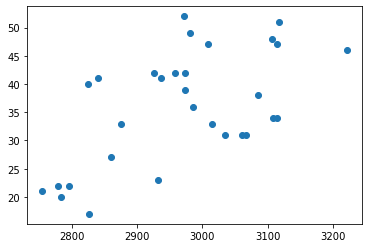

In [19]:
plt.scatter(tabela['FG'],tabela['W'])

In [20]:
tabela['FG'].corr(tabela['W'])

0.5881760820356188

Očekivano, postoji značajna korelacija između broja koševa postignutih iz igre i broja pobeda. Ko više koševa daje, češće pobeđuje. Ipak, ta veza nije sasvim pouzdana. Ne možemo reći da je većiu broj koševa garancija pobede. Vidimo da ima timova koji imau 3100 pogodaka i svega 30-35 pobeda, dok neki drugi sa 3000 pogodaka ostvaruju 50 pobeda. 

Na sličan način kao za broj koševa, možemo da izračunamo koeeficijent korelacije sa brojem pobeda i za sve ostale promenljive. Te rezultate ćemo staviti u niz __kk__.

In [21]:
kk=[tabela[i].corr(tabela['W']) for i in tabela.columns]

In [ ]:
kk

Biće nam lakše da prikažemo rezultate ako ih umesto u listu stavimo u _DataFrame_ gde će nazivi promenljivih biti imena redova.

In [22]:
kk = pd.DataFrame (kk, columns = ['Koeficijent korelacije'])

In [23]:
kk.index=tabela.columns

In [24]:
kk

,Koeficijent korelacije
MP,0.134535
FG,0.588176
FGA,-0.051646
FG%,0.746993
3P,0.396493
3PA,0.114913
3P%,0.786860
2P,0.147163
2PA,-0.129206
2P%,0.545897


Da bi rezultati bili pregledniji, sortiraćemo ih u opadajućem redosledu i prikazati grafički.

In [25]:
kk=kk.sort_values('Koeficijent korelacije', ascending=False)

In [ ]:
kk

<AxesSubplot:xlabel='Koeficijent korelacije'>

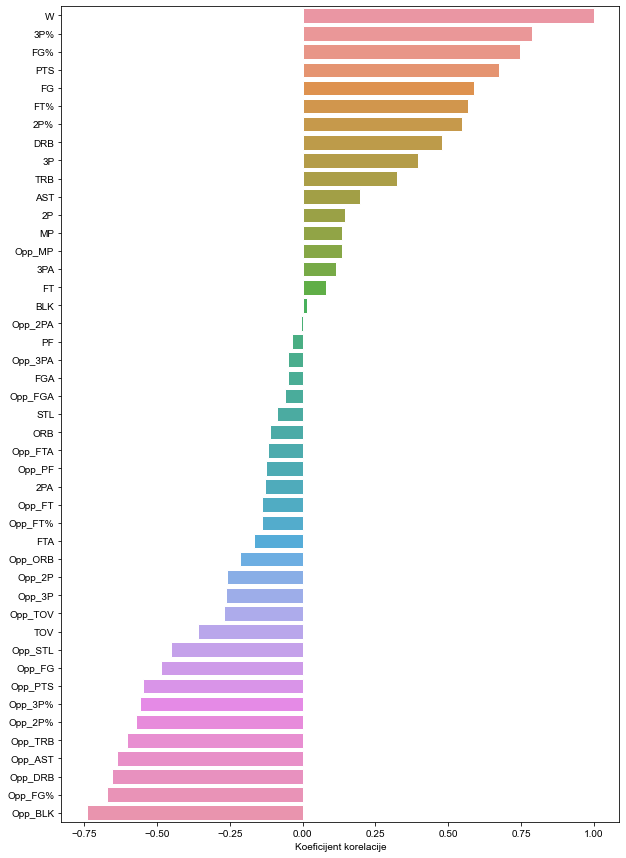

In [26]:
f, ax = plt.subplots(figsize = (10,15))
sns.set_theme(style="whitegrid")
sns.barplot(y=kk.index,x=kk['Koeficijent korelacije'],orient="h")

Najveći koeficijent korelacije, logično, broj pobeda ima sam sa sobom (1.00). Sledeći na listi je procenat trojki (3P%, 0.79), dok je na trećem mestu procenat šuta iz igre (FG%, 0.75). Posle toga imamo sve slabiju zavisnost. Vidimo da broj blokada (BLK) nema praktično nikakve veze sa brojem pobeda nekog tima (BLK, 0.01). Ipak, postoje i značajne negativne zavisnosti. Najveći negativni koeficijent korelacije sa brojem pobeda ima broj blokada protivničkog tima (Opp_BLK, -0.74). To znači da tim koji primi mnogo blokada, nema mnogo izgleda za pobedu. Na sličan način, možemo da utvrdimo i tumačimo i druge statistike tima. To ostavljamo za samostalan rad.

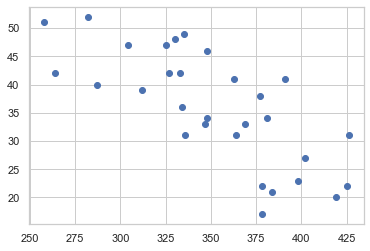

In [27]:
plt.scatter(tabela['Opp_BLK'],tabela['W'])

Kada bismo na osnovu svih dostupnih statistika pravili predikciju uspešnosti tima, broj promenljivih bi sa 45 trebalo smanjiti na nekoliko najznačajnijih koje su međusobno nezavisne. Korelacija svake promenljive sa brojem pobeda nam daje koliko su određene promenljive značajne, ali za meru nezavisnosti moramo da odredimo korelaciju svake promenljive sa svakom drugom. Pomoću funkcije `corr()` dobijamo tabelu korelacija (tkor) između podataka datih u kolonama originalne tabele (tabela).

_Naravno, pravljenje modela za predikciju ne treba raditi na osnovu agregiranih podataka (srednje vrednosti za celu sezonu) nego na osnovu podataka za svaku pojedinačnu utakmicu. Tek tada bi se videlo koja je statistika koliko važna._

<AxesSubplot:>

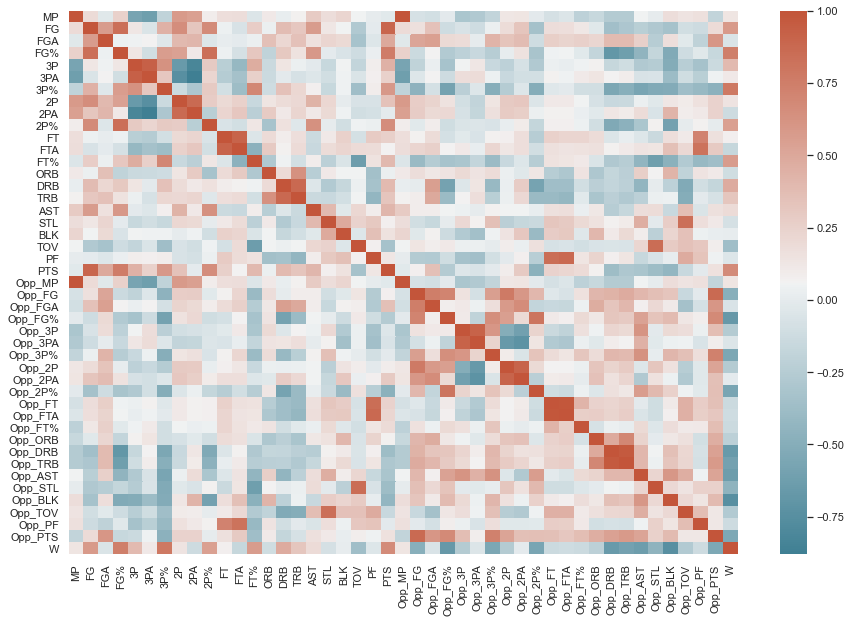

In [28]:
tkor = tabela.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(tkor, xticklabels=tkor.columns, yticklabels=tkor.columns, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Polja sa intezivno crvenom bojom najviše koreliraju međusobno, bela praktično ne koreliraju, dok intenzivno plava predstavljaju jaku negativnu korelaciju. Na pretodnoj slici možemo da primetimo crvenu dijagonalu gde svaka promenljiva savršeno korelira sa samom sobom. Osim toga ima oblasti od 2-3 polja koja prilično dobro koreliraju međusobno. To su, na primer, 3P i 3PA ili FT i FTA, što je logično -- veći broj pogadaka zahteva veći broj šuteva. Ovakve promenljive daju redundantne informacije i bilo bi dobro da iz tog skupa uzmemo samo jednu, onnu koja ima najveću korelaciju.

Ovde nećemo ulaziti u odabir promenljivih (_feature selection_) jer je tema složenija od prostog posmatranja koeficijenata korelacije. Uostalom, najbolji izbor promenjljivih za različite modele predikcije ne mora da bude isti. Završićemo samo jednim ad-hoc izborom najinformativnijih promenjlivih koje međusobno nisu previše povezane. To je ono što bi trebalo da se pojavljuje kao statistika u poluvremenu ili za vreme tajm-auta.

In [29]:
mala=tabela[['3P%','2P%','DRB','Opp_AST','Opp_DRB','Opp_FG%','Opp_BLK','W']]

In [30]:
mala.corr()

,3P%,2P%,DRB,Opp_AST,Opp_DRB,Opp_FG%,Opp_BLK,W
3P%,1.000000,0.297874,0.349702,-0.565784,-0.554649,-0.593611,-0.516696,0.786860
2P%,0.297874,1.000000,0.158661,-0.306513,-0.528892,-0.115427,-0.598041,0.545897
DRB,0.349702,0.158661,1.000000,-0.436206,-0.179588,-0.589244,-0.209387,0.479320
Opp_AST,-0.565784,-0.306513,-0.436206,1.000000,0.410505,0.535031,0.601274,-0.637009
Opp_DRB,-0.554649,-0.528892,-0.179588,0.410505,1.000000,0.317247,0.357684,-0.654089
Opp_FG%,-0.593611,-0.115427,-0.589244,0.535031,0.317247,1.000000,0.384251,-0.671593
Opp_BLK,-0.516696,-0.598041,-0.209387,0.601274,0.357684,0.384251,1.000000,-0.741117
W,0.786860,0.545897,0.479320,-0.637009,-0.654089,-0.671593,-0.741117,1.000000


<AxesSubplot:>

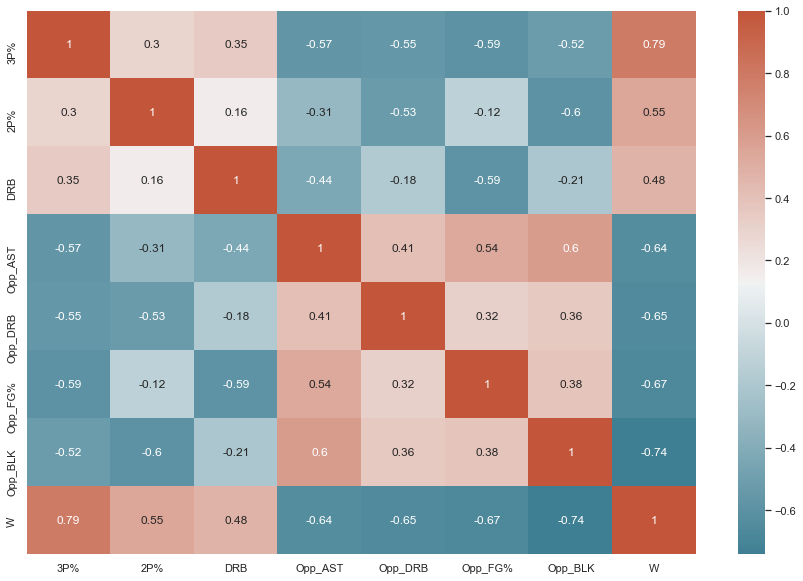

In [31]:
mkor = mala.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(mkor, xticklabels=mkor.columns, yticklabels=mkor.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))